In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [31]:
# Read the data from the text file
with open("groceries.txt", "r") as file:
    lines = file.readlines()

# Process the lines to create a list of lists
data = [line.strip().split(',') for line in lines]

In [23]:
# df = pd.DataFrame(data)
# df.fillna(0, inplace=True)
# df

In [32]:
from mlxtend.preprocessing import TransactionEncoder

# Transaction Encoder starting
te = TransactionEncoder()

# Fit the encoder and transform the data. Row will be my user, column will be t/f for the ites
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data, columns=te.columns_)
df = df.replace(False,0)
df = df.replace(True,1)

df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)
frequent_itemsets.sort_values(by = "support", ascending = False, inplace = True)
frequent_itemsets

c:\Users\Abhijit\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
117,0.255516,(whole milk)
73,0.193493,(other vegetables)
88,0.183935,(rolls/buns)
98,0.174377,(soda)
118,0.139502,(yogurt)
...,...,...
763,0.005084,"(brown bread, soda, whole milk)"
346,0.005084,"(domestic eggs, cream cheese )"
835,0.005084,"(frankfurter, root vegetables, whole milk)"
131,0.005084,"(beef, fruit/vegetable juice)"


In [55]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,0.455803
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696,0.208496
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452,0.228543
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732
...,...,...,...,...,...,...,...,...,...,...
2955,"(soda, bottled water)",(bottled beer),0.028978,0.080529,0.005084,0.175439,2.178584,0.002750,1.115103,0.557131
2956,"(bottled beer, bottled water)",(soda),0.015760,0.174377,0.005084,0.322581,1.849901,0.002336,1.218776,0.466787
2957,(soda),"(bottled beer, bottled water)",0.174377,0.015760,0.005084,0.029155,1.849901,0.002336,1.013797,0.556466
2958,(bottled beer),"(soda, bottled water)",0.080529,0.028978,0.005084,0.063131,2.178584,0.002750,1.036455,0.588367


In [56]:
# prepare the top 10 persentile items for visualization
rules_eda = rules.copy(deep=True)
rules_support_eda = rules_eda['support'] >= rules_eda['support'].quantile(q = 0.9)
rules_confi_eda = rules_eda['confidence'] >= rules_eda['confidence'].quantile(q = 0.9)
rules_lift_eda = rules_eda['lift'] > 1
rules_zhang_eda = rules_eda['zhangs_metric'] > 0
rules_best_eda = rules_eda[rules_support_eda & rules_confi_eda & rules_lift_eda & rules_zhang_eda]
rules_best_eda.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732
6,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401,0.483202
9,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
15,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252,0.409045


In [57]:
rules_best_eda['antecedents'] = rules_best_eda['antecedents'].apply(lambda a: ', '.join(list(a)))
rules_best_eda['consequents'] = rules_best_eda['consequents'].apply(lambda a: ', '.join(list(a)))
rules_best_eda.head()

C:\Users\Abhijit\AppData\Local\Temp\ipykernel_20548\2571308028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_best_eda['antecedents'] = rules_best_eda['antecedents'].apply(lambda a: ', '.join(list(a)))
C:\Users\Abhijit\AppData\Local\Temp\ipykernel_20548\2571308028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_best_eda['consequents'] = rules_best_eda['consequents'].apply(lambda a: ', '.join(list(a)))


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,other vegetables,whole milk,0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
4,yogurt,whole milk,0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732
6,root vegetables,whole milk,0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401,0.483202
9,root vegetables,other vegetables,0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,0.622764
15,tropical fruit,whole milk,0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252,0.409045


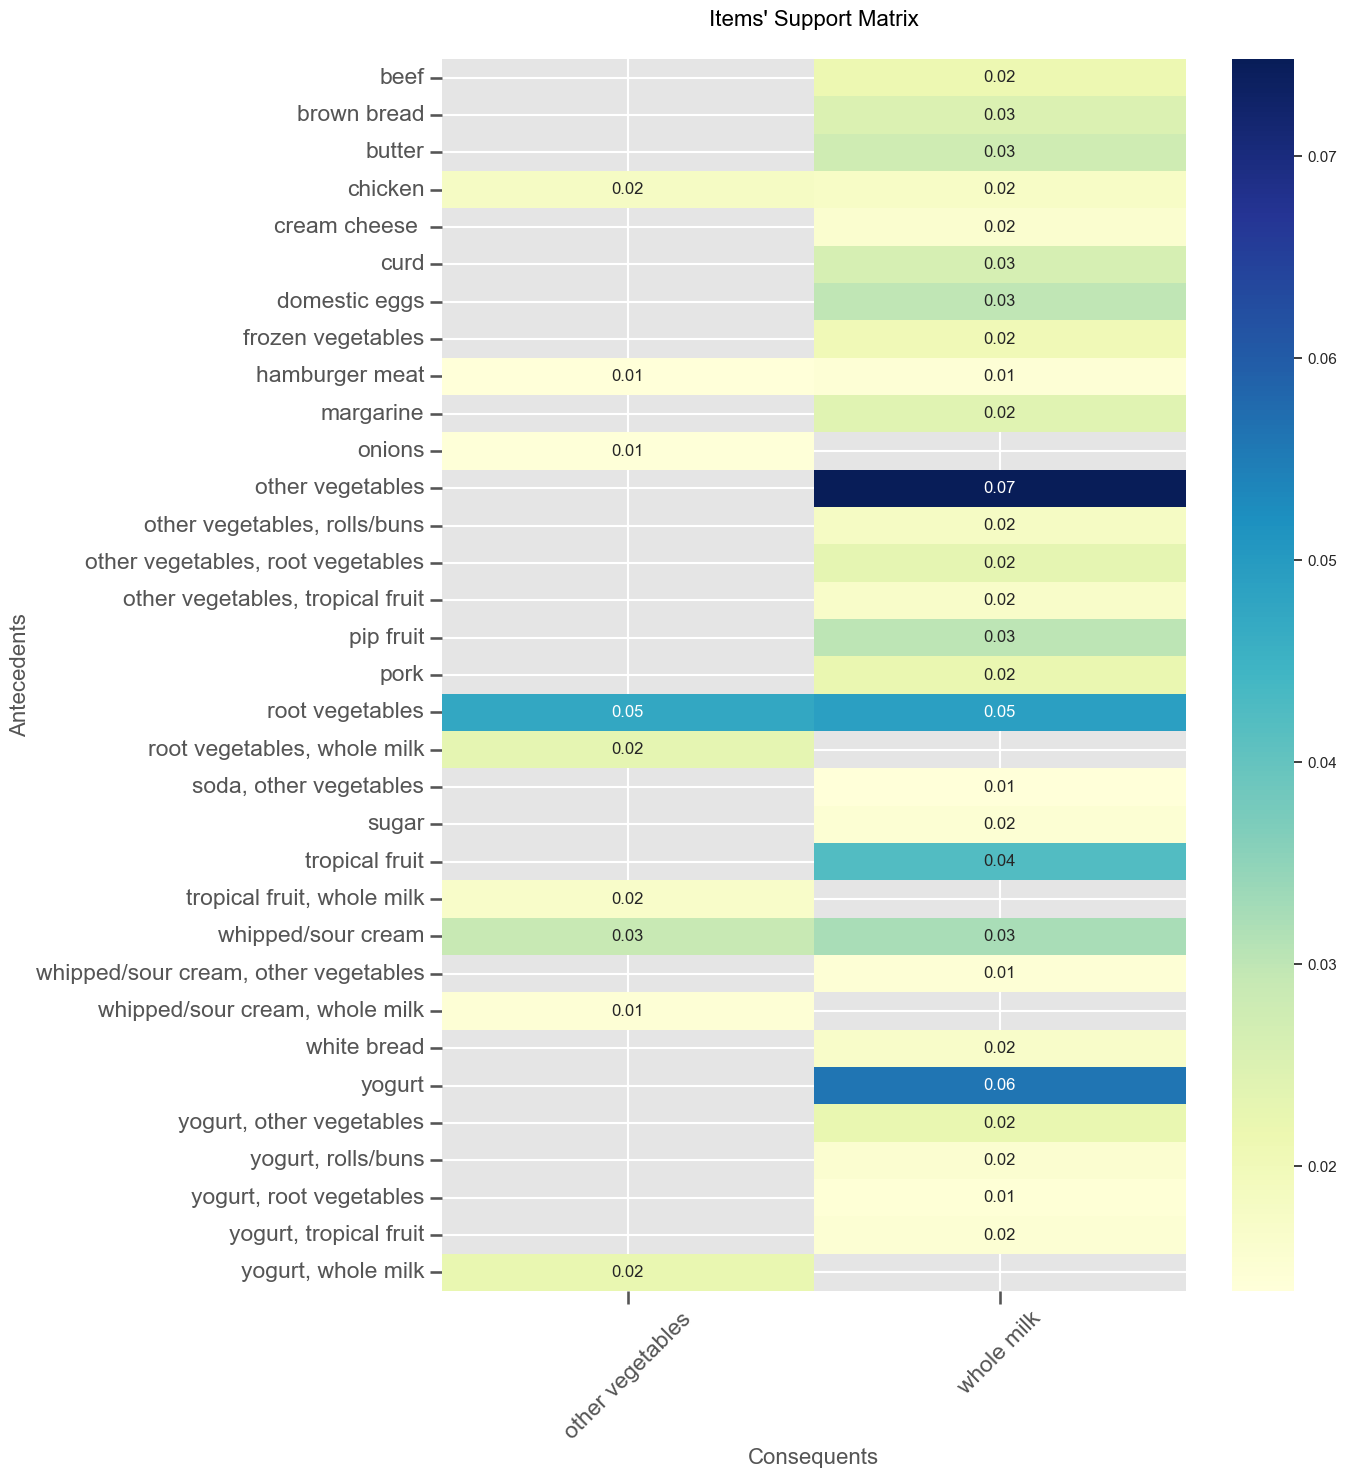

In [58]:
# plot a heatmap to know how strong the association is based on lift values
pivot_support = rules_best_eda.pivot(index='antecedents', columns='consequents', values='support')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(12, 16))
sns.set()
ax = sns.heatmap(data=pivot_support, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title("Items' Support Matrix", fontsize=16, y=1.02)
ax.set_xlabel("Consequents",fontsize=16)
ax.set_ylabel("Antecedents",fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show() 

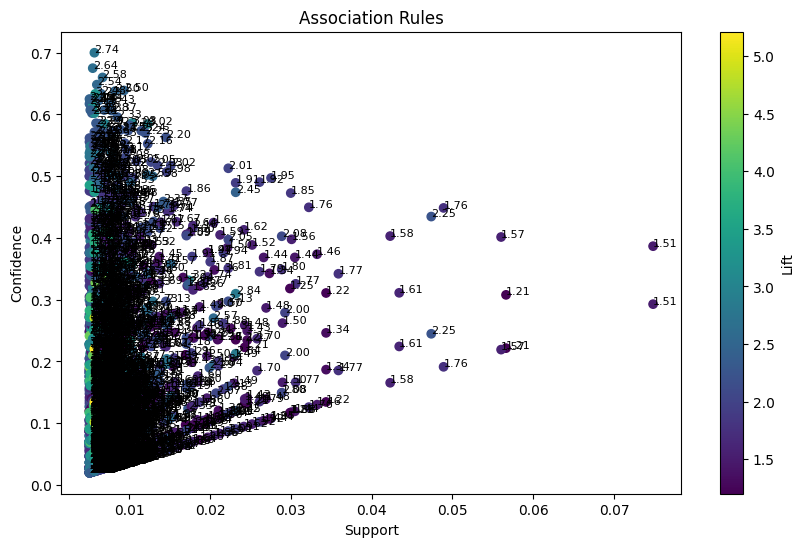

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(label='Lift')
plt.title('Association Rules')
for i, txt in enumerate(rules['lift']):
    plt.annotate(f'{txt:.2f}', (rules['support'][i], rules['confidence'][i]), fontsize=8)
plt.show()

In [59]:
import igraph
subset_rules = rules.copy()
# Convert association rules to igraph graph
groceries_graph = igraph.Graph.TupleList(subset_rules[['antecedents', 'consequents', 'lift']],
                                        directed=True, edge_attrs=['lift'])

# Write the graph to a GraphML file
groceries_graph.write_graphml('groceries.graphml')


In [37]:
df_ar = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.01)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(bottled water),0.033452,0.110524,0.007321,0.218845,1.980074,0.003624,1.138668,0.512099
1,(bottled water),(UHT-milk),0.110524,0.033452,0.007321,0.066237,1.980074,0.003624,1.035111,0.556472
2,(UHT-milk),(other vegetables),0.033452,0.193493,0.008134,0.243161,1.256694,0.001662,1.065626,0.211331
3,(other vegetables),(UHT-milk),0.193493,0.033452,0.008134,0.042039,1.256694,0.001662,1.008964,0.253267
4,(UHT-milk),(rolls/buns),0.033452,0.183935,0.006406,0.191489,1.041071,0.000253,1.009344,0.040816
...,...,...,...,...,...,...,...,...,...,...
2955,"(root vegetables, tropical fruit)","(yogurt, whole milk)",0.021047,0.056024,0.005694,0.270531,4.828814,0.004515,1.294059,0.809957
2956,(whole milk),"(yogurt, root vegetables, tropical fruit)",0.255516,0.008134,0.005694,0.022284,2.739554,0.003616,1.014472,0.852909
2957,(yogurt),"(tropical fruit, root vegetables, whole milk)",0.139502,0.011998,0.005694,0.040816,3.401937,0.004020,1.030045,0.820513
2958,(root vegetables),"(tropical fruit, yogurt, whole milk)",0.108998,0.015150,0.005694,0.052239,3.448112,0.004043,1.039133,0.796841


In [28]:
#set a threshold value for the support value and calculate the support value.
# df = apriori(df, min_support = 0.005, use_colnames = True, verbose = 1)
# df

c:\Users\Abhijit\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 25 combinations | Sampling itemset size 5 43


,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
995,0.005186,"(whipped/sour cream, other vegetables, root ve..."
996,0.007829,"(yogurt, other vegetables, root vegetables, wh..."
997,0.007626,"(whole milk, yogurt, other vegetables, tropica..."
998,0.005592,"(whipped/sour cream, yogurt, other vegetables,..."


In [29]:
# df_ar = association_rules(df, metric = "confidence", min_threshold = 0.01)
# df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(bottled water),0.033452,0.110524,0.007321,0.218845,1.980074,0.003624,1.138668,0.512099
1,(bottled water),(UHT-milk),0.110524,0.033452,0.007321,0.066237,1.980074,0.003624,1.035111,0.556472
2,(UHT-milk),(other vegetables),0.033452,0.193493,0.008134,0.243161,1.256694,0.001662,1.065626,0.211331
3,(other vegetables),(UHT-milk),0.193493,0.033452,0.008134,0.042039,1.256694,0.001662,1.008964,0.253267
4,(UHT-milk),(rolls/buns),0.033452,0.183935,0.006406,0.191489,1.041071,0.000253,1.009344,0.040816
...,...,...,...,...,...,...,...,...,...,...
2955,"(root vegetables, tropical fruit)","(yogurt, whole milk)",0.021047,0.056024,0.005694,0.270531,4.828814,0.004515,1.294059,0.809957
2956,(whole milk),"(yogurt, root vegetables, tropical fruit)",0.255516,0.008134,0.005694,0.022284,2.739554,0.003616,1.014472,0.852909
2957,(yogurt),"(tropical fruit, root vegetables, whole milk)",0.139502,0.011998,0.005694,0.040816,3.401937,0.004020,1.030045,0.820513
2958,(root vegetables),"(tropical fruit, yogurt, whole milk)",0.108998,0.015150,0.005694,0.052239,3.448112,0.004043,1.039133,0.796841
